In [2]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib

In [3]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [4]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)

1.25.2
1.5.3
3.7.3


In [5]:
# Load the Boston Housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])   # hstack, horizontally stack tgt, start from beginning, to end, skip every 2 two rows 135, all columns,,, all the even rows, first two columns
target = raw_df.values[1::2, 2]
                               
housing_data = data   # make a copy

In [6]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [7]:
raw_df.values[1::2, :2]

array([[396.9 ,   4.98],
       [396.9 ,   9.14],
       [392.83,   4.03],
       ...,
       [396.9 ,   5.64],
       [393.45,   6.48],
       [396.9 ,   7.88]])

In [8]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
print(raw_df.shape, data.shape, target.shape)

(1012, 11) (506, 13) (506,)


### Activity 1

In [10]:
print(housing_data.shape)
print(housing_data.size)
print(housing_data.ndim) #ndim = 2 because this is a 2D table

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

print("-"*80) # draw a line

#compute the statistics for each column of the housing data
i = 0
while i < housing_data.shape [1]:   # 13 columns
    x = housing_data[:, i]   # retrieve column by column (ie var by var)
    print(feature_names[i], 
          "\t\t min = ", np.min(x), \
           ", max =", np.max(x), 
           ", std = ", round(np.std(x),3), \
           ", mean=", round(np.mean(x),3), 
           ", median = ", round(np.median(x),3))
    i = i + 1
    

(506, 13)
6578
2
--------------------------------------------------------------------------------
CRIM 		 min =  0.00632 , max = 88.9762 , std =  8.593 , mean= 3.614 , median =  0.257
ZN 		 min =  0.0 , max = 100.0 , std =  23.299 , mean= 11.364 , median =  0.0
INDUS 		 min =  0.46 , max = 27.74 , std =  6.854 , mean= 11.137 , median =  9.69
CHAS 		 min =  0.0 , max = 1.0 , std =  0.254 , mean= 0.069 , median =  0.0
NOX 		 min =  0.385 , max = 0.871 , std =  0.116 , mean= 0.555 , median =  0.538
RM 		 min =  3.561 , max = 8.78 , std =  0.702 , mean= 6.285 , median =  6.208
AGE 		 min =  2.9 , max = 100.0 , std =  28.121 , mean= 68.575 , median =  77.5
DIS 		 min =  1.1296 , max = 12.1265 , std =  2.104 , mean= 3.795 , median =  3.207
RAD 		 min =  1.0 , max = 24.0 , std =  8.699 , mean= 9.549 , median =  5.0
TAX 		 min =  187.0 , max = 711.0 , std =  168.37 , mean= 408.237 , median =  330.0
PTRATIO 		 min =  12.6 , max = 22.0 , std =  2.163 , mean= 18.456 , median =  19.05
B 		 min =  

In [11]:
housing_data.shape[1]

13

In [12]:
display(housing_data)

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

### Activity 2

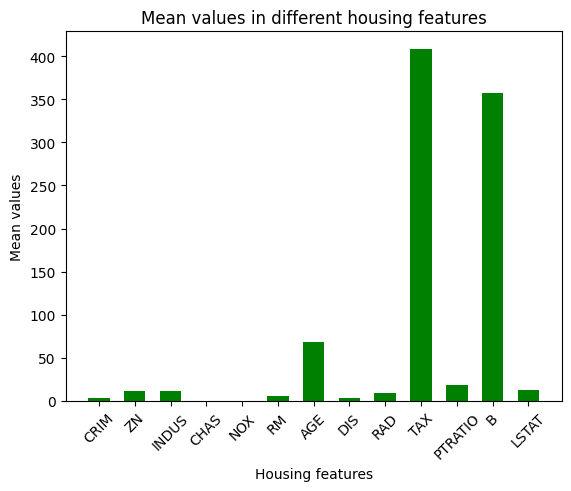

In [37]:
import matplotlib.pyplot as plt

plt.bar(feature_names, 
        housing_data.mean(axis=0), 
        color ='green',
        width = 0.6)
 
plt.xlabel("Housing features")
plt.ylabel("Mean values")
plt.title("Mean values in different housing features")

plt.xticks(rotation = 45)
           
plt.show()

### Activity 3

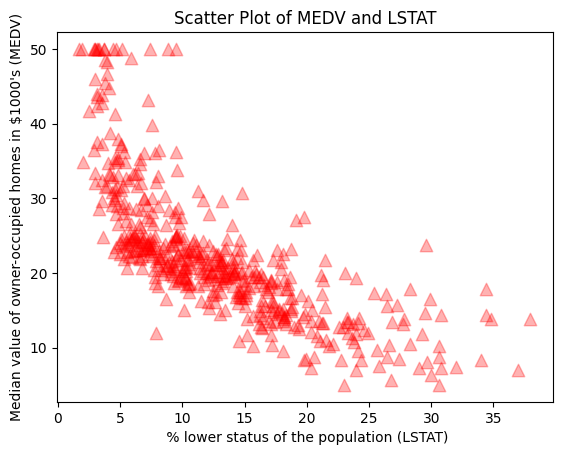

In [58]:
import matplotlib.pyplot as plt

housing_price = target

# LSTAT    % lower status of the population
# MEDV     Median value of owner-occupied homes in $1000's

plt.scatter(housing_data[:,12], housing_price, 
            color = "red", marker = "^", 
            alpha = 0.3, edgecolors = "face",
            s = 80)   
    # all the rows but only col 12 which is LSTAT
    # and housing_price MEDV

plt.xlabel(" % lower status of the population (LSTAT)")
plt.ylabel("Median value of owner-occupied homes in $1000's (MEDV)")
plt.title("Scatter Plot of MEDV and LSTAT")
plt.show()

## What else can you plot?

1)  What is the distribution of number of rooms?
2)  What is the crime rate like from the data?
3)  What is the average number of rooms vs Tax?

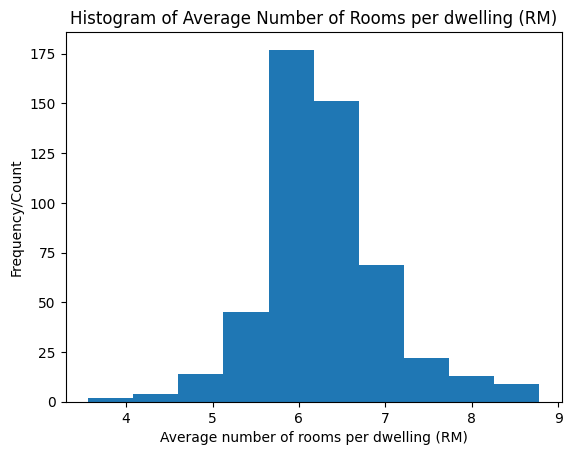

In [38]:
# What is the distribution of number of rooms?


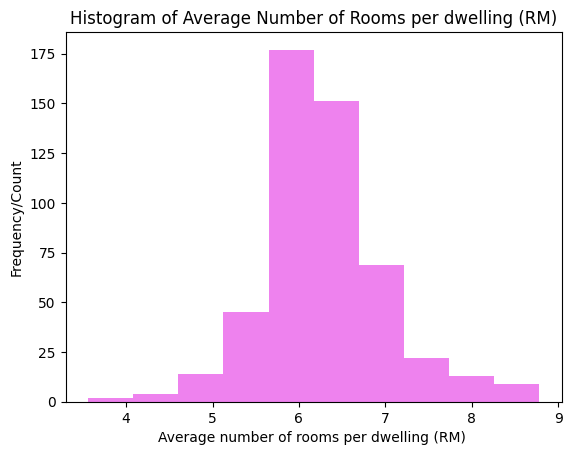

In [76]:
plt.hist(housing_data[:,5], bins = 10, range = None, 
        align = "mid", orientation = "vertical", 
        rwidth = 1, color = "violet")

plt.xlabel("Average number of rooms per dwelling (RM) ")
plt.ylabel("Frequency/Count")
plt.title("Histogram of Average Number of Rooms per dwelling (RM)")
plt.show()

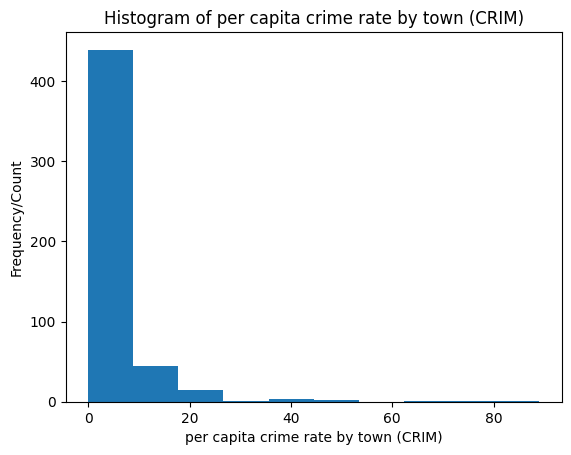

In [44]:
# What is the distribution of CRIM?


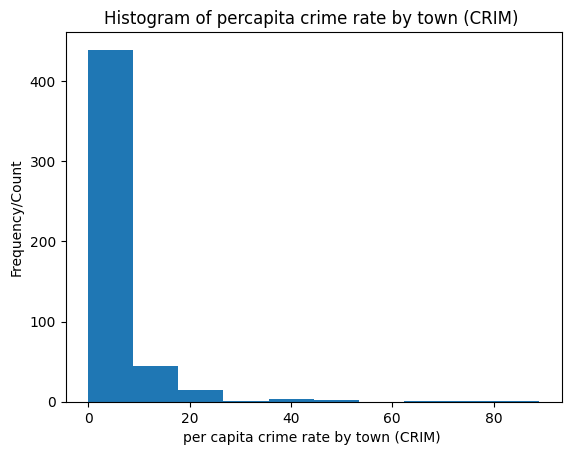

In [73]:
plt.hist(housing_data[:,0], bins = 10, range = None, 
        align = "mid", orientation = "vertical", 
        rwidth = 1, color = None)

plt.xlabel("per capita crime rate by town (CRIM) ")
plt.ylabel("Frequency/Count")
plt.title("Histogram of percapita crime rate by town (CRIM) ")
plt.show()

In [ ]:
# What is the average number of rooms vs Tax?

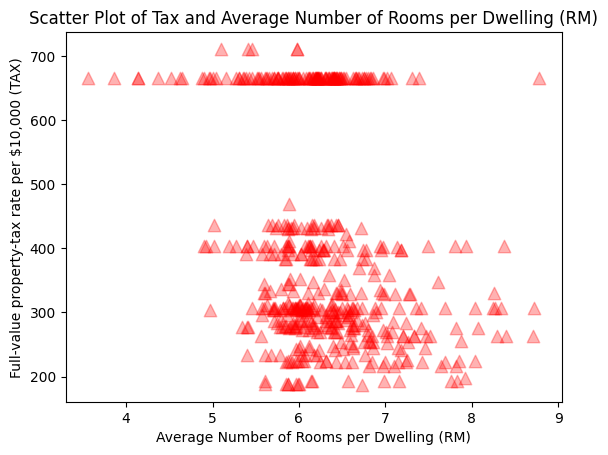

In [82]:
plt.scatter(housing_data[:,5], housing_data[:,9], 
            color = "red", marker = "^", 
            alpha = 0.3, edgecolors = "face",
            s = 80)   
    # all the rows but only col 12 which is LSTAT
    # and housing_price MEDV

plt.xlabel("Average Number of Rooms per Dwelling (RM)")
plt.ylabel("Full-value property-tax rate per $10,000 (TAX)")
plt.title("Scatter Plot of Tax and Average Number of Rooms per Dwelling (RM)")
plt.show()

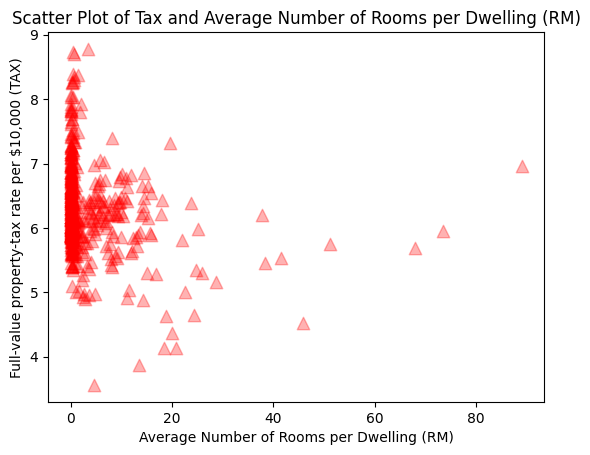

In [84]:
plt.scatter(housing_data[:,0], housing_data[:,5], 
            color = "red", marker = "^", 
            alpha = 0.3, edgecolors = "face",
            s = 80)   
    # all the rows but only col 12 which is LSTAT
    # and housing_price MEDV

plt.xlabel("Average Number of Rooms per Dwelling (RM)")
plt.ylabel("Full-value property-tax rate per $10,000 (TAX)")
plt.title("Scatter Plot of Tax and Average Number of Rooms per Dwelling (RM)")
plt.show()